# 回归

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [45]:
data = pd.read_excel('AirQualityUCI\AirQualityUCI.xlsx')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## 数据预处理

1. 清理数据：除去值为-200的无效值

In [46]:
for col in data:
    for i in data.index:
            if data[col][i] == -200 :
                data=data.drop([i],axis=0) 

data.dropna(axis=0,how='all')
data=data.drop(['Date'],axis=1)

In [47]:
from sklearn import preprocessing
#将Time由string对应成number
le = preprocessing.LabelEncoder()
data['Time']=le.fit_transform(data['Time'])
data.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,17,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,18,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,19,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,20,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,21,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


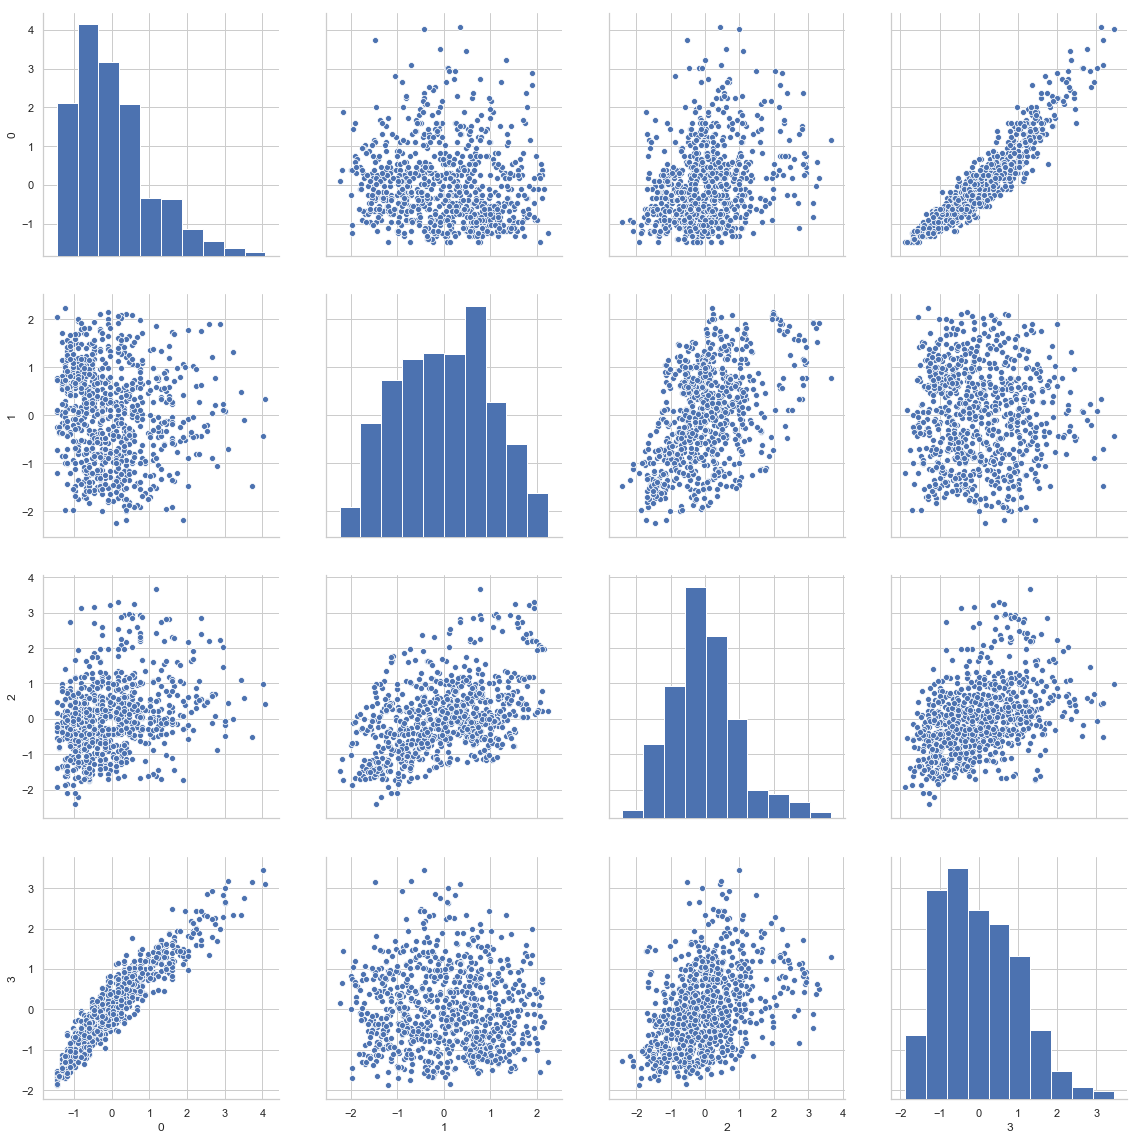

In [48]:
scalar = StandardScaler()
features_plot = ['CO(GT)', 'RH', 'AH', 'PT08.S1(CO)']
sns.set(style='whitegrid', context='notebook')
co_data=data[features_plot]
co_data = scalar.fit_transform(co_data)
co_data = pd.DataFrame(co_data)

sns.pairplot(co_data, height=4.0);
plt.tight_layout()
plt.show()

## 划分训练集和测试集
1. X为除去Date和观测值CO(GT)外的所有samples的变量
2. y为观测值
3. 将X，y划分训练集和测试集X_train, X_test, y_train, y_test

In [49]:
from sklearn.cross_validation import train_test_split
X=data.drop(['CO(GT)'],axis=1)
y=data['CO(GT)']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [51]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(620, 13)
(620,)
(207, 13)
(207,)


## 回归
1. scikit-learn的线性回归算法使用的是最小二乘法来实现

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
rgs = LinearRegression()
rgs.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
print (rgs.intercept_)
print (rgs.coef_)

0.9336797336909248
[ 9.65993507e-03  1.24002183e-03  9.26538726e-04  1.50273155e-01
 -1.48287859e-03  4.75275169e-03 -1.28009445e-04  3.97917161e-03
 -4.82837441e-04 -4.52646118e-04 -2.84323016e-02 -3.64507629e-03
  3.89023480e-01]


 -  CO(GT)=2.2263393728518994+1.02283695e-03 \*PT08.S1(CO)+2.02694537e-01\*NMHC(GT)+...+8.22606835e-01\*AH

In [55]:
#模型拟合测试集
print("Predicted values:", rgs.predict(X_test))

Predicted values: [2.42219761 6.37851955 2.01796853 1.14281371 1.47092644 0.91223112
 1.41634089 3.95793342 5.15357651 1.80645217 1.4131792  2.08922433
 1.21486001 1.49949536 3.75526588 1.66473447 1.15715883 4.24658464
 4.80656539 2.08528871 1.53637335 1.96883304 1.43700727 2.42922242
 2.66113151 0.37450333 2.20567196 2.02256784 1.52568484 1.22744992
 3.27914782 0.55616923 1.1497864  4.84064552 2.2582634  1.81791664
 2.99484501 1.18399177 1.45784022 1.22832123 3.1182613  3.10480296
 2.45018794 1.75559863 4.17745033 2.64894454 3.03710217 4.60670039
 3.13368813 2.53335725 4.48776434 1.29824463 1.77840096 0.7865997
 0.6193687  5.5662266  0.39136994 3.37787431 3.0899469  0.99577686
 3.57108929 0.81411074 1.57459798 3.24883374 2.53810627 6.02353534
 1.13130051 3.45270349 2.13595879 4.03263282 3.84539897 0.88442983
 1.78324317 2.24713323 2.84124285 2.54399072 1.64456997 2.06268161
 1.5393575  2.64701517 3.54804194 1.71223414 2.39054847 5.22796769
 5.38124874 1.04777167 1.39142288 0.87608469 

In [56]:
print("R^2 score for liner regression: ", rgs.score(X_test, y_test))

R^2 score for liner regression:  0.9766841308697846


In [57]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rgs, X,y, cv=10) #cv参数用于规定将原始数据分成多少份
scores

array([0.95865698, 0.97753118, 0.97882282, 0.95293484, 0.9774073 ,
       0.97068455, 0.9543947 , 0.94802814, 0.95844381, 0.96888202])

In [58]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))#均值和置信区间

Accuracy: 0.96 (+/- 0.02)
